<h1 align="center">Halloween Storm at Japenese Observatories</h1>

In [1]:
%load_ext autoreload
%autoreload 2

import os
import glob

import numpy as np
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use(['seaborn-paper', 'lucas'])

# Local Import
import bezpy

## Reading in the data

1) raw files downloaded from:
  - http://www.kakioka-jma.go.jp/obsdata/metadata/en
  
2) Saved in HDF format for ease of use later

In [2]:
# Reading in the hdf files
kak_E = pd.read_hdf("/Users/glucas/work/data/halloween_storm/elec_fields/kak.hdf", "Efield")
kny_E = pd.read_hdf("/Users/glucas/work/data/halloween_storm/elec_fields/kny.hdf", "Efield")
mmb_E = pd.read_hdf("/Users/glucas/work/data/halloween_storm/elec_fields/mmb.hdf", "Efield")

kak_B = pd.read_hdf("/Users/glucas/work/data/halloween_storm/mag_fields/kak.hdf", "Bfield")
kny_B = pd.read_hdf("/Users/glucas/work/data/halloween_storm/mag_fields/kny.hdf", "Bfield")
mmb_B = pd.read_hdf("/Users/glucas/work/data/halloween_storm/mag_fields/mmb.hdf", "Bfield")

## Interpolate and detrend the data

In [3]:
kak_E = kak_E.interpolate(limit_direction='both') \
        .apply(lambda x: bezpy.mag.detrend_polynomial(x, deg=0), axis=0)
kny_E = kny_E.interpolate(limit_direction='both') \
        .apply(lambda x: bezpy.mag.detrend_polynomial(x, deg=0), axis=0)
mmb_E = mmb_E.interpolate(limit_direction='both') \
        .apply(lambda x: bezpy.mag.detrend_polynomial(x, deg=0), axis=0)

kak_B = kak_B.interpolate(limit_direction='both') \
        .apply(lambda x: bezpy.mag.detrend_polynomial(x, deg=0), axis=0)
kny_B = kny_B.interpolate(limit_direction='both') \
        .apply(lambda x: bezpy.mag.detrend_polynomial(x, deg=0), axis=0)
mmb_B = mmb_B.interpolate(limit_direction='both') \
        .apply(lambda x: bezpy.mag.detrend_polynomial(x, deg=0), axis=0)

## Plot each Japanese observatory

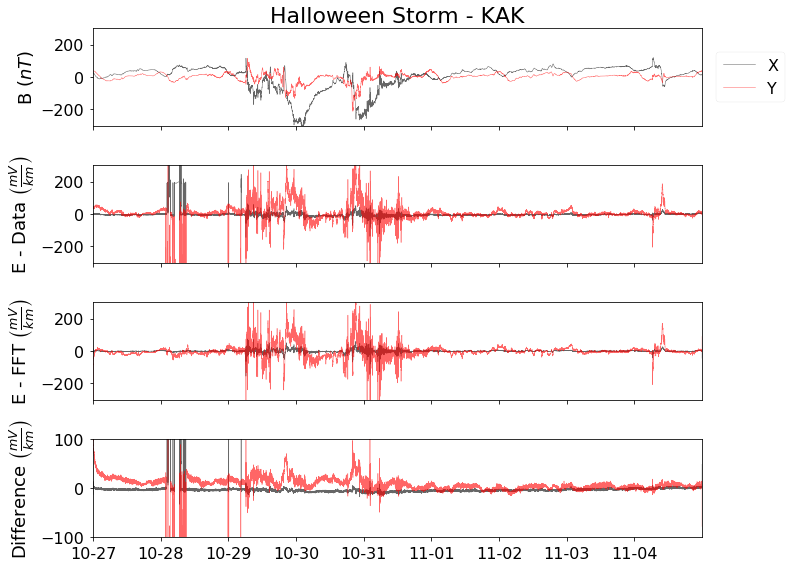

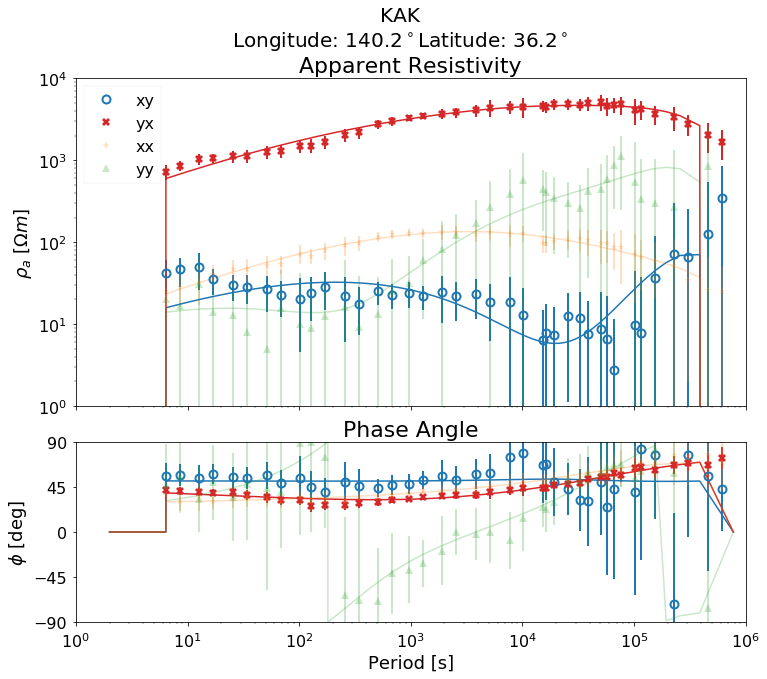

In [4]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

name = 'KAK'
data_B = kak_B
data_E = kak_E
MT_file = "/Users/glucas/work/data/MT_sites/" + \
          "MT_TF_INTERMAGNET.{0}.2000-2011/INTERMAGNET.{0}.2000-2011.xml".format(name)
site = bezpy.mt.read_xml(MT_file)


ax1.plot(data_B.index, data_B["X"], c='k', alpha=0.6, lw=0.5, label='X')
ax1.plot(data_B.index, data_B["Y"], c='r', alpha=0.6, lw=0.5, label='Y')
ax1.legend(bbox_to_anchor=(1.01, 0.5), loc='center left')
ax1.set(xlim=[data_B.index[0], data_B.index[-1]],
        ylim=[-300, 300],
        ylabel=r'B $(nT)$',
        title='Halloween Storm - {site}'.format(site=name))

ax1.xaxis.set_major_locator(mpl.dates.HourLocator(interval=24))
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter("%m-%d"))

ax2.plot(data_E.index, data_E["X"], c='k', alpha=0.6, lw=0.5, label='X')
ax2.plot(data_E.index, data_E["Y"], c='r', alpha=0.6, lw=0.5, label='Y')
ax2.set(ylim=[-300, 300],
        ylabel=r'E - Data $\left(\frac{mV}{km}\right)$')


# Do a convolution at the site
Ex, Ey = site.convolve_fft(data_B["X"], data_B["Y"], dt=1)

ax3.plot(data_E.index, Ex, c='k', alpha=0.6, lw=0.5, label='X')
ax3.plot(data_E.index, Ey, c='r', alpha=0.6, lw=0.5, label='Y')
ax3.set(ylim=[-300, 300],
        ylabel=r'E - FFT $\left(\frac{mV}{km}\right)$')

# Do a difference of the convolution and the real data
ax4.plot(data_E.index, data_E['X']-Ex, c='k', alpha=0.6, lw=0.5, label='X')
ax4.plot(data_E.index, data_E['Y']-Ey, c='r', alpha=0.6, lw=0.5, label='Y')
ax4.set(ylim=[-100, 100],
        ylabel=r'Difference $\left(\frac{mV}{km}\right)$')
plt.tight_layout()

site.plot_apparent_resistivity(interp_freqs=np.fft.rfftfreq(len(data_B), d=1));

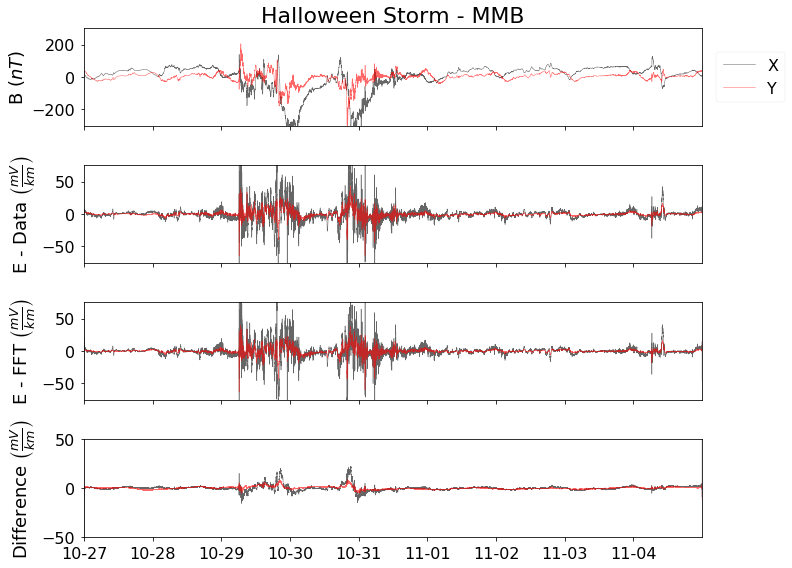

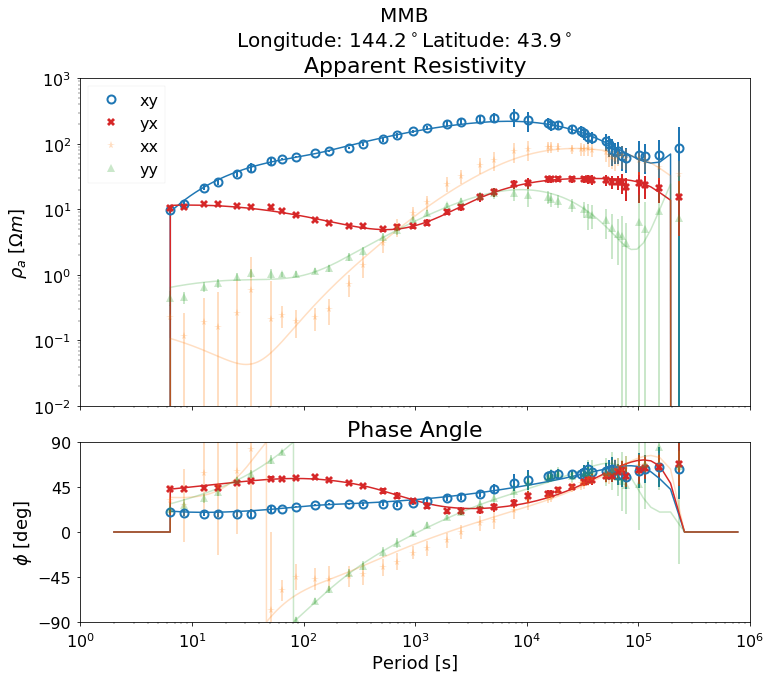

In [5]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)


name = 'MMB'
data_B = mmb_B
data_E = mmb_E
MT_file = "/Users/glucas/work/data/MT_sites/" + \
          "MT_TF_INTERMAGNET.{0}.2000-2011/INTERMAGNET.{0}.2000-2011.xml".format(name)
site = bezpy.mt.read_xml(MT_file)


ax1.plot(data_B.index, data_B["X"], c='k', alpha=0.6, lw=0.5, label='X')
ax1.plot(data_B.index, data_B["Y"], c='r', alpha=0.6, lw=0.5, label='Y')
ax1.legend(bbox_to_anchor=(1.01, 0.5), loc='center left')
ax1.set(xlim=[data_B.index[0], data_B.index[-1]],
        ylim=[-300, 300],
        ylabel=r'B $(nT)$',
        title='Halloween Storm - {site}'.format(site=name))

ax1.xaxis.set_major_locator(mpl.dates.HourLocator(interval=24))
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter("%m-%d"))

ax2.plot(data_E.index, data_E["X"], c='k', alpha=0.6, lw=0.5, label='X')
ax2.plot(data_E.index, data_E["Y"], c='r', alpha=0.6, lw=0.5, label='Y')
ax2.set(ylim=[-75, 75],
        ylabel=r'E - Data $\left(\frac{mV}{km}\right)$')


# Do a convolution at the site
Ex, Ey = site.convolve_fft(data_B["X"], data_B["Y"], dt=1)

ax3.plot(data_E.index, Ex, c='k', alpha=0.6, lw=0.5, label='X')
ax3.plot(data_E.index, Ey, c='r', alpha=0.6, lw=0.5, label='Y')
ax3.set(ylim=[-75, 75],
        ylabel=r'E - FFT $\left(\frac{mV}{km}\right)$')

# Do a difference of the convolution and the real data
ax4.plot(data_E.index, data_E['X']-Ex, c='k', alpha=0.6, lw=0.5, label='X')
ax4.plot(data_E.index, data_E['Y']-Ey, c='r', alpha=0.6, lw=0.5, label='Y')
ax4.set(ylim=[-50, 50],
        ylabel=r'Difference $\left(\frac{mV}{km}\right)$')
plt.tight_layout()

site.plot_apparent_resistivity(interp_freqs=np.fft.rfftfreq(len(data_B), d=1));

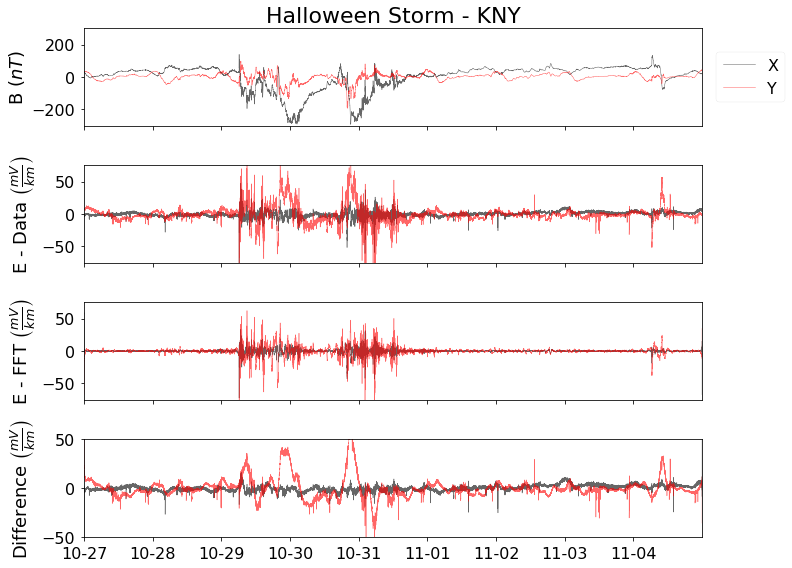

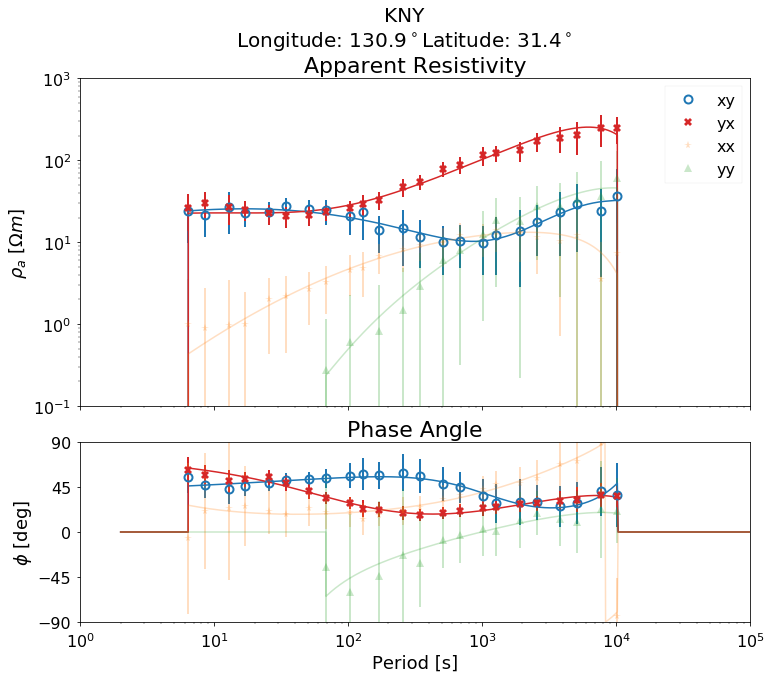

In [6]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

name = 'KNY'
data_B = kny_B
data_E = kny_E
MT_file = "/Users/glucas/work/data/MT_sites/" + \
          "MT_TF_INTERMAGNET.{0}.2000-2011/INTERMAGNET.{0}.2000-2011.xml".format(name)
site = bezpy.mt.read_xml(MT_file)


ax1.plot(data_B.index, data_B["X"], c='k', alpha=0.6, lw=0.5, label='X')
ax1.plot(data_B.index, data_B["Y"], c='r', alpha=0.6, lw=0.5, label='Y')
ax1.legend(bbox_to_anchor=(1.01, 0.5), loc='center left')
ax1.set(xlim=[data_B.index[0], data_B.index[-1]],
        ylim=[-300, 300],
        ylabel=r'B $(nT)$',
        title='Halloween Storm - {site}'.format(site=name))

ax1.xaxis.set_major_locator(mpl.dates.HourLocator(interval=24))
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter("%m-%d"))

ax2.plot(data_E.index, data_E["X"], c='k', alpha=0.6, lw=0.5, label='X')
ax2.plot(data_E.index, data_E["Y"], c='r', alpha=0.6, lw=0.5, label='Y')
ax2.set(ylim=[-75, 75],
        ylabel=r'E - Data $\left(\frac{mV}{km}\right)$')


# Do a convolution at the site
Ex, Ey = site.convolve_fft(data_B["X"], data_B["Y"], dt=1)

ax3.plot(data_E.index, Ex, c='k', alpha=0.6, lw=0.5, label='X')
ax3.plot(data_E.index, Ey, c='r', alpha=0.6, lw=0.5, label='Y')
ax3.set(ylim=[-75, 75],
        ylabel=r'E - FFT $\left(\frac{mV}{km}\right)$')

# Do a difference of the convolution and the real data
ax4.plot(data_E.index, data_E['X']-Ex, c='k', alpha=0.6, lw=0.5, label='X')
ax4.plot(data_E.index, data_E['Y']-Ey, c='r', alpha=0.6, lw=0.5, label='Y')
ax4.set(ylim=[-50, 50],
        ylabel=r'Difference $\left(\frac{mV}{km}\right)$')
plt.tight_layout()

site.plot_apparent_resistivity(interp_freqs=np.fft.rfftfreq(len(data_B), d=1));